Description
------------------------
The purpose of this notebook is to review the tutorial for imbalanced datasets on Kaggle as well as to apply various 
sampling approaches to imbalanced datasets to see how they affect the accuracy of ml models.

References
------------------------
- https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice?resource=download
- https://imbalanced-learn.org/stable/

**Generate Synthetic Data**
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html


**Plot Decision Boundaries from Estimator**
- https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator
- https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508
- https://stackabuse.com/bytes/plot-decision-boundaries-using-python-and-scikit-learn/

**Open ML Datasets**
- https://www.openml.org/


**Seaborn Pairwise Plots**
- https://seaborn.pydata.org/generated/seaborn.pairplot.html


**Missing Data Visualization**
- https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity




# Next Steps

- See how the model reacts to an increase / decrease in the balance of the datasets.
- Apply resampling methods, inspect / plot, inspect results. 

### Libraries

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [33]:
# Under Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids, TomekLinks, NearMiss, RandomUnderSampler, AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour, NeighbourhoodCleaningRule, OneSidedSelection, RepeatedEditedNearestNeighbours, InstanceHardnessThreshold

# Over Sampling
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler, SMOTENC, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN


### Options

### Globals

In [4]:
DIR_ROOT = r'C:\Users\ccirelli\OneDrive - American International Group, Inc\Desktop\GitHub\imbalanced_data_sandbox'

### Generate Dataset

In [5]:
X, y = make_classification(
    n_samples=10_000,
    n_features=5,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=[0.1, 0.9],
    flip_y=0.01,
    class_sep=0.9,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=123
)

In [6]:
df = pd.DataFrame(data=X, columns=[f'f_{f}' for f in range(X.shape[1])])
df['target'] = y

---
# EDA
---

### Structural

In [7]:
df.shape

(10000, 6)

In [8]:
df.dtypes

f_0       float64
f_1       float64
f_2       float64
f_3       float64
f_4       float64
target      int32
dtype: object

In [9]:
df.head()

,f_0,f_1,f_2,f_3,f_4,target
0,0.023727,1.451994,-1.352769,-0.490712,1.745897,1
1,0.068742,1.417014,-0.282052,1.780648,0.775848,1
2,-0.834216,1.021722,0.844164,0.558487,0.971305,1
3,-0.439094,1.727418,0.336591,1.864900,1.139145,1
4,-0.078976,1.927853,-1.476141,-0.357637,2.212637,1


<br>

---
# Inspect Target
---

<br>

In [10]:
# Number of classes
df.target.unique()

array([1, 0])

In [11]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie chart will 

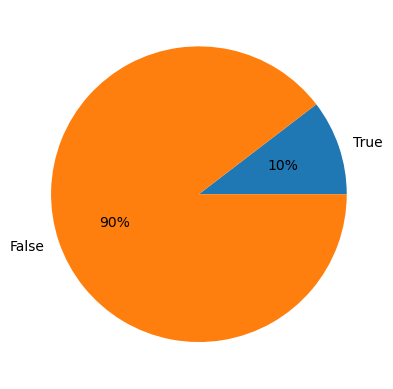

In [12]:
x = df.groupby('target')['target'].count().values
plt.pie(x=x, autopct='%1.0f%%', labels=['True', 'False'])
plt.show()

### Distribution Features

In [13]:
df_ind = df.drop('target', axis=1)

### Compare Didstribution Target Variables

In [14]:
def plot_comp_hist(df, target_column_name: str, feature_name: str):
    fig, ax = plt.subplots()


    ax.hist(df[df[target_column_name]==0][feature_name], bins=15, alpha=0.5, color="green", label="negative", density=True)
    ax.hist(df[df[target_column_name]==1][feature_name], bins=15, alpha=0.5, color="blue", label="positive", density=True)
    
    ax.set_xlabel("target")
    ax.set_ylabel(feature_name)

    fig.suptitle(f"Target vs. {feature_name}")
    fig.set_figwidth(4)
    fig.set_figheight(3)

    ax.legend();
    figure(figsize=(8, 6), dpi=200)

    plt.show()
    return None

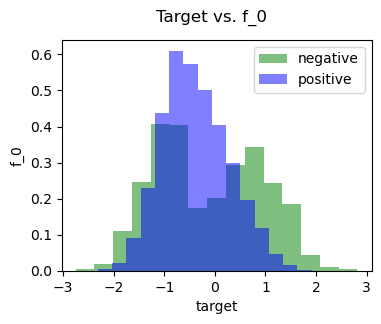

<Figure size 1600x1200 with 0 Axes>

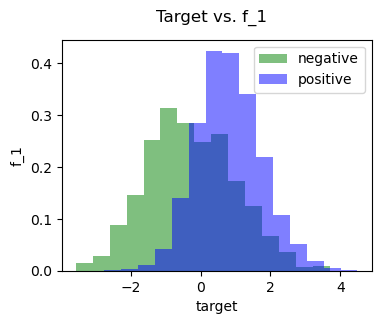

<Figure size 1600x1200 with 0 Axes>

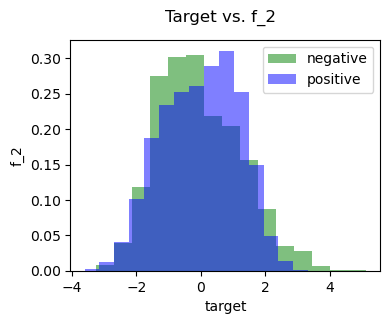

<Figure size 1600x1200 with 0 Axes>

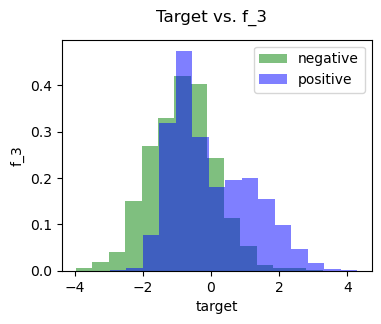

<Figure size 1600x1200 with 0 Axes>

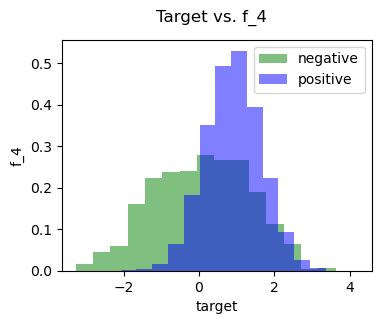

<Figure size 1600x1200 with 0 Axes>

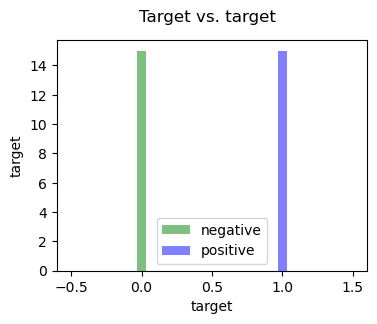

<Figure size 1600x1200 with 0 Axes>

In [15]:
for f in df.columns:
    plot_comp_hist(df, target_column_name='target', feature_name=f)

### Box Plots

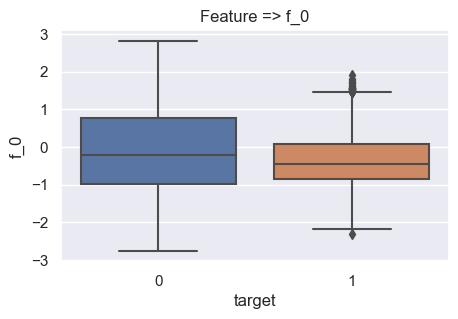

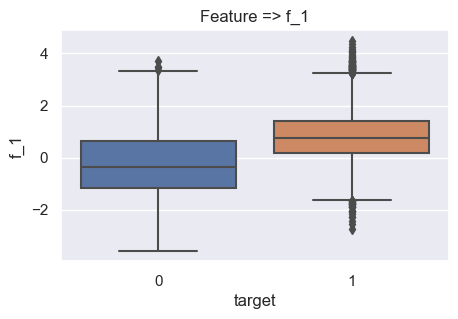

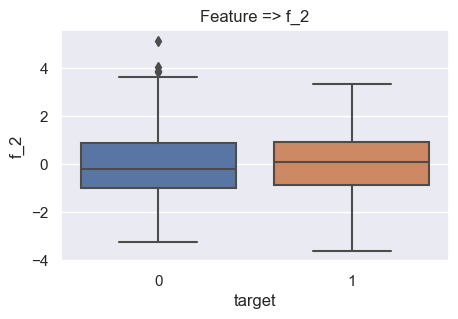

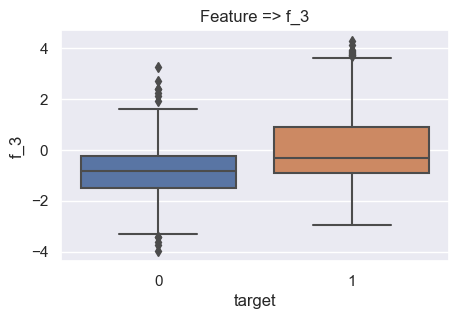

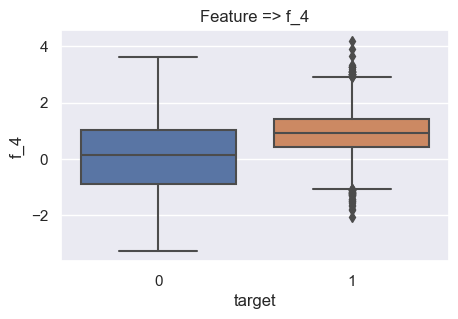

In [16]:
for f in df_ind.columns:
    if f != 'target':
        sns.set(rc={'figure.figsize':(5,3)})

        sns.boxplot(data=df, x='target', y=f).set(title=f'Feature => {f}')
        plt.show()

### Feature Correlation

C:\Users\ccirelli\AppData\Local\Temp\ipykernel_28984\9386661.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_ind.corr(), dtype=np.bool))


<AxesSubplot:>

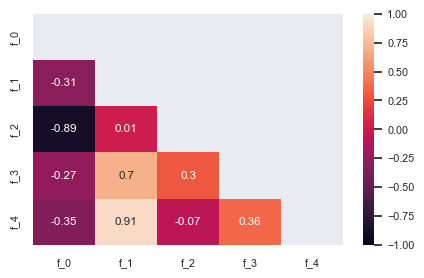

In [17]:
mask = np.triu(np.ones_like(df_ind.corr(), dtype=np.bool))
sns.set(font_scale=0.7)

sns.heatmap(df_ind.corr().round(2), vmin=-1, vmax=1, annot=True, mask=mask)

---
### Seaborn Pairwise Plots 
---

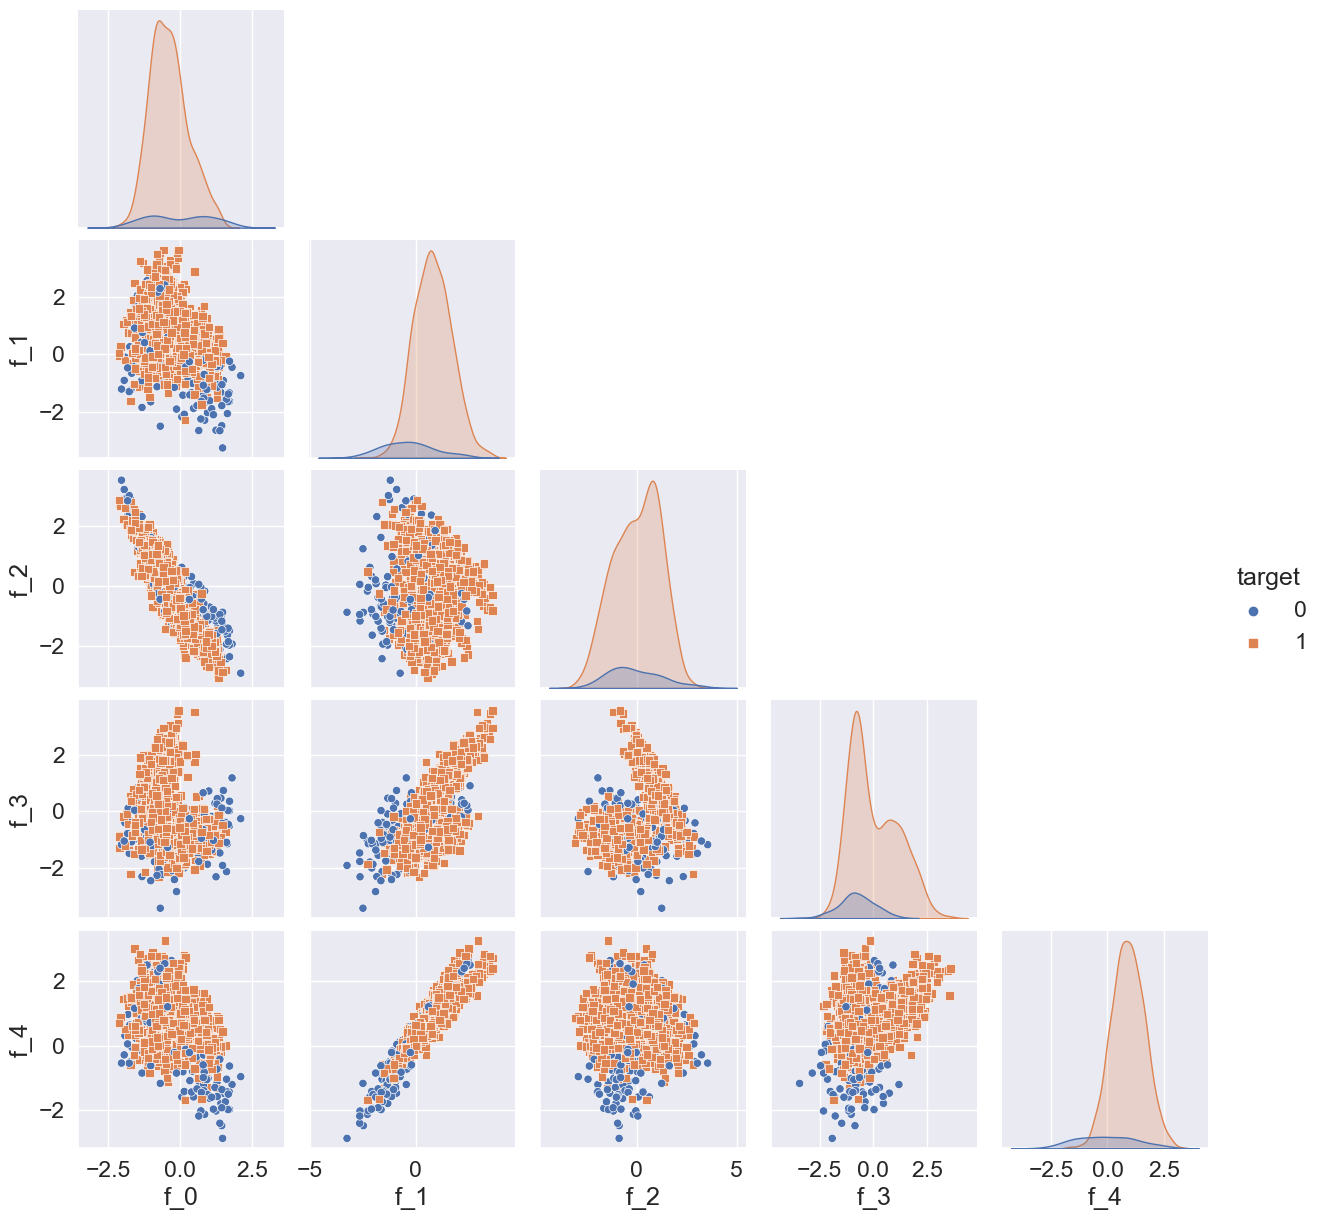

In [18]:
# Seaborn Options
sns.set(font_scale=1.5)

# Take Random Sample
r_sample = df.sample(frac=0.15)

sns.pairplot(
    data=r_sample,
    kind='scatter',
    diag_kind='kde',
    hue='target',
    markers=['o', 's'],
    corner=True
)


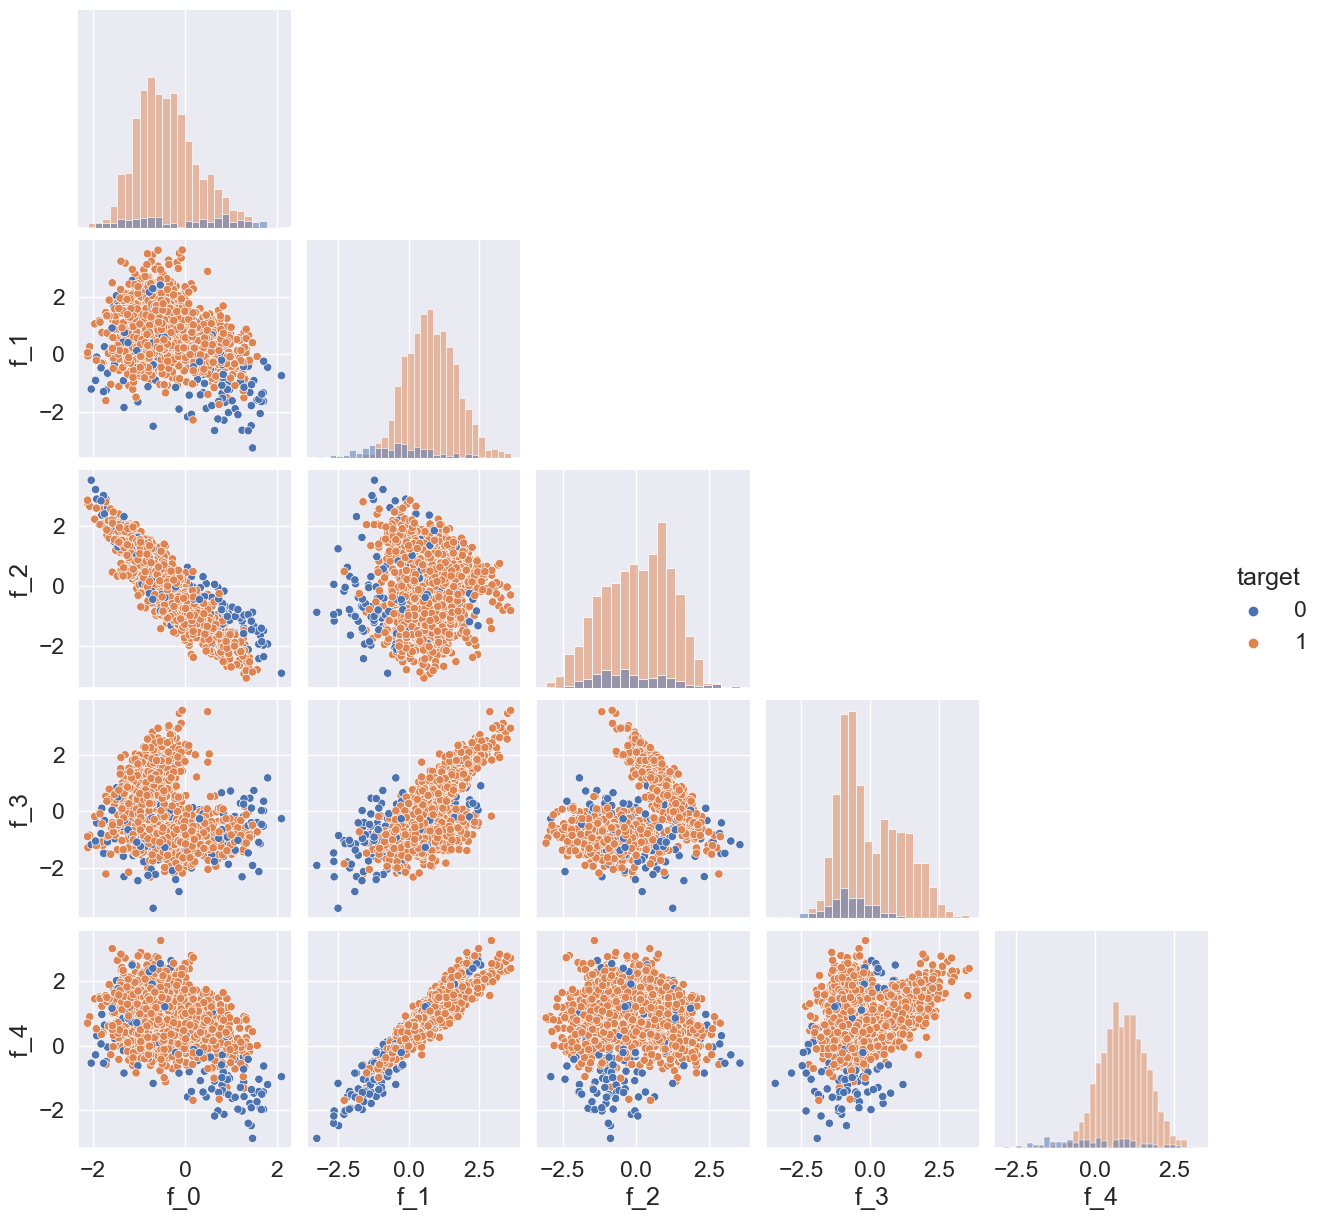

In [19]:
sns.pairplot(
    data=r_sample,
    hue='target',
    kind='scatter',
    diag_kind='hist',
    corner=True
)

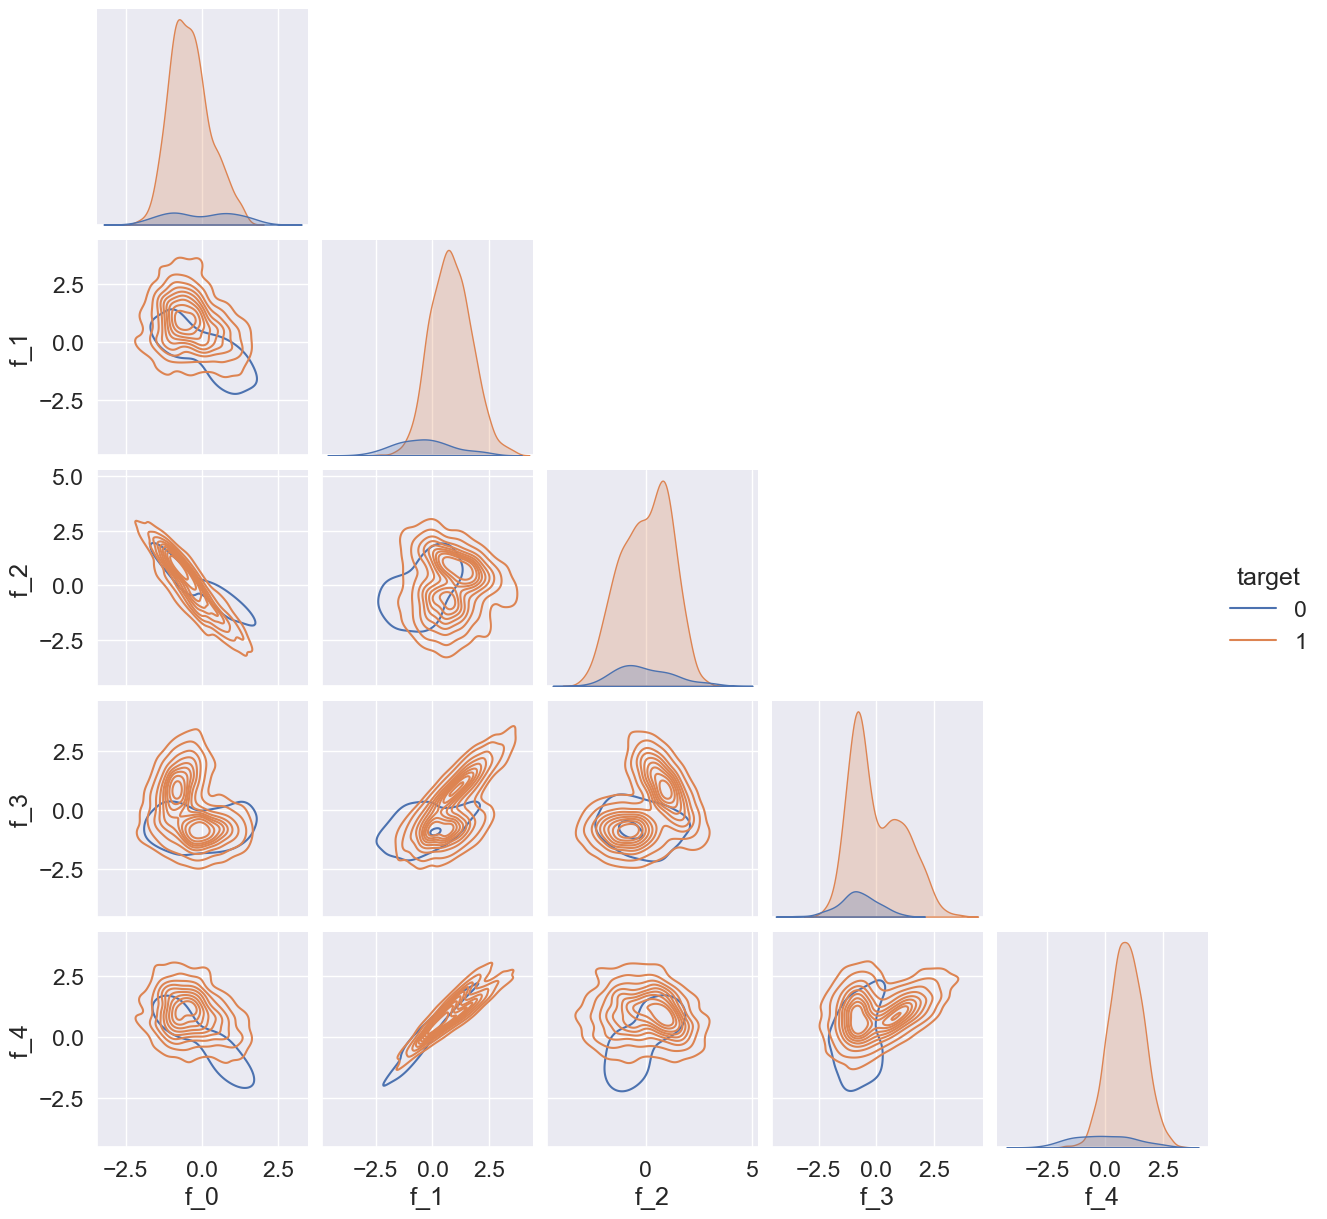

In [20]:
sns.pairplot(
    data=r_sample,
    hue='target',
    kind='kde',
    diag_kind='kde',
    corner=True
)

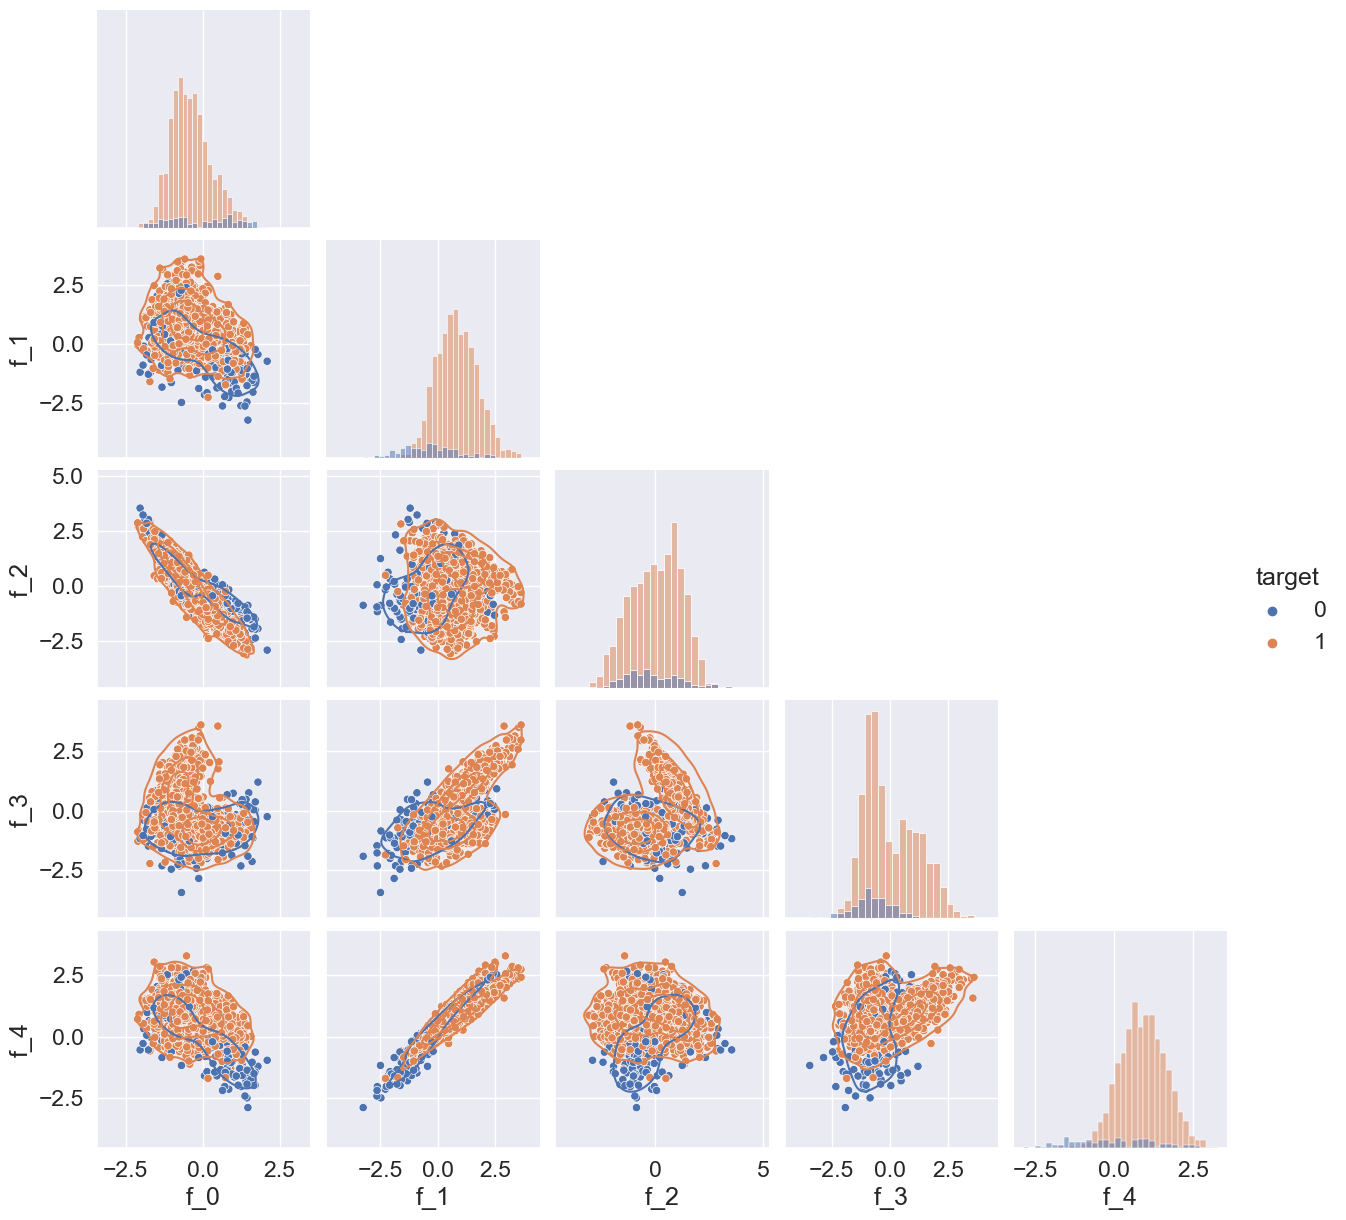

In [21]:
# Plot scatter and on top the kernel density as a topographical map. 

g = sns.pairplot(
    data=r_sample,
    hue='target',
    kind='scatter',
    diag_kind='hist',
    corner=True
)
g.map_lower(sns.kdeplot, levels=4, color=".2")

<br>
<br>

---
# Random Over Sampling Techniques
---

<br>
<br>

### Split Dataset (Train Test)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=123
)

### Train SVM With Original Data

In [23]:
clf = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.0001,
    C=1.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=1000
)

In [24]:
clf.fit(X_train, y_train)

LinearSVC()

In [25]:
y_hat = clf.predict(X_test)

### Display Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_hat, labels=clf.classes_)

C:\Users\ccirelli\Anaconda3\envs\ml-sandbox\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


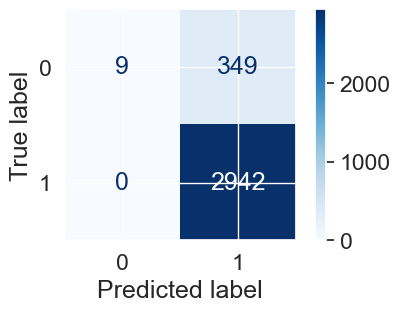

In [27]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)



In [28]:
class_report = classification_report(y_test, y_hat, output_dict=True)

In [29]:
class_report

{'0': {'precision': 1.0,
  'recall': 0.025139664804469275,
  'f1-score': 0.04904632152588556,
  'support': 358},
 '1': {'precision': 0.8939532057125493,
  'recall': 1.0,
  'f1-score': 0.9440077009465746,
  'support': 2942},
 'accuracy': 0.8942424242424243,
 'macro avg': {'precision': 0.9469766028562747,
  'recall': 0.5125698324022346,
  'f1-score': 0.4965270112362301,
  'support': 3300},
 'weighted avg': {'precision': 0.9054576761231273,
  'recall': 0.8942424242424243,
  'f1-score': 0.8469179513003302,
  'support': 3300}}

In [30]:
def plot_decision_boundary(X, y,feature1, feature2):
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = X[:, :2]
    
    clf = LinearSVC(C=1.0, max_iter=1000)
    clf.fit(X, y)

    disp = DecisionBoundaryDisplay.from_estimator(
        estimator=clf,
        X=X,
        grid_resolution=400,
        plot_method='contourf',
        response_method="predict",
        alpha=0.7,
        xlabel=feature1,
        ylabel=feature2,
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], 
                 c=y, edgecolor="k",
                 cmap=plt.cm.coolwarm)
    plt.show()

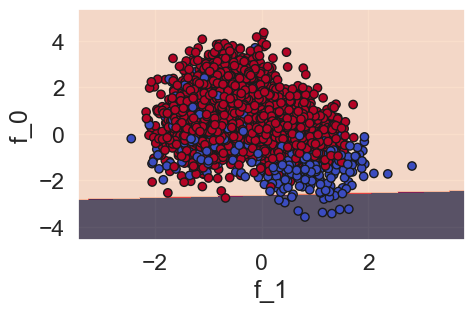

In [31]:
plot_decision_boundary(X_train, y_train, feature1='f_1', feature2='f_0')